# <机器学习>课程 Lecture 3 实验

## SVM 支持向量机

给定多组数据,其输入维度为2,输出维度为1.
请使用SVM算法进行分类,并观察分类边界与支持向量.

In [1]:
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np

#可视化函数
def plot_decision_regions(x, y, classifier, resolution=0.02):
    markers = ['s', 'o', '^', 'v']
    colors = ['r', 'g', 'b', 'cyan']
    cmap = ListedColormap(colors[:len(np.unique(y))])

    x1_min, x1_max = x[:, 0].min() - 1, x[:, 0].max() + 1
    x2_min, x2_max = x[:, 1].min() - 1, x[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    grid = np.array([xx1.ravel(), xx2.ravel()]).T

    # == 对于生成meshgrid的每一个点计算降维和分类结果 ==
    z = classifier.predict(grid)
    z = z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, z, alpha=0.4, cmap=cmap)

    for idx, cc in enumerate(np.unique(y)):
        plt.scatter(x=x[y[:, 0] == cc, 0],
                    y=x[y.ravel() == cc, 1],
                    alpha=0.6,
                    c=cmap(idx),
                    edgecolor='black',
                    marker=markers[idx],
                    label=cc)


### 线性可分

加载线性可分的数据,并可视化.

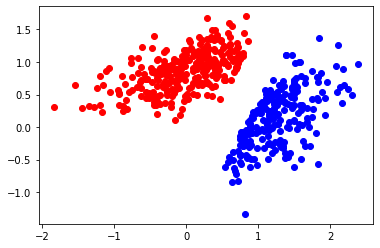

In [2]:
import numpy as np
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

data_filename = 'cls_data_svm_linear_easy.npy'
cls_data = np.load(data_filename)

x_data, y_data = cls_data[:, :-1], cls_data[:, -1]

x_train, x_test, y_train, y_test = train_test_split(
    x_data, y_data,
    train_size=0.8, shuffle=True,
    stratify=y_data
)

plt.figure()

pos_data = x_data[y_data == 1, :]
neg_data = x_data[y_data == 0, :]

plt.scatter(pos_data[:, 0], pos_data[:, 1], c='red')
plt.scatter(neg_data[:, 0], neg_data[:, 1], c='blue')

plt.show()

使用最简单的SVM分类器进行分类,并可视化结果.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


get 14 support vectors
get 7 positive support vectors
get 7 negative support vectors


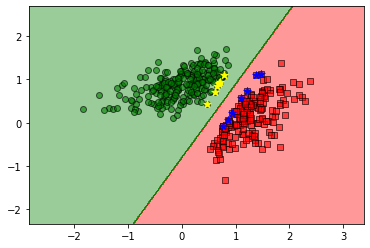

accuracy is 100.00%


In [3]:
from sklearn.svm import SVC

model = SVC(kernel='linear')
model.fit(x_train, y_train)

sv = model.support_vectors_
pos_ev = np.stack([item for item in sv if y_train[np.where(np.all(x_train == item, axis=1))[0]] == 1])
neg_ev = np.stack([item for item in sv if y_train[np.where(np.all(x_train == item, axis=1))[0]] == 0])
print(f"get {sv.shape[0]} support vectors")
print(f"get {pos_ev.shape[0]} positive support vectors")
print(f"get {neg_ev.shape[0]} negative support vectors")

plt.figure()
plot_decision_regions(x_train, y_train[:, None], classifier=model)
plt.scatter(
    pos_ev[:, 0], pos_ev[:, 1], marker='*', color='yellow', s=60
)
plt.scatter(
    neg_ev[:, 0], neg_ev[:, 1], marker='*', color='blue', s=60
)
plt.show()

accu = (model.predict(x_test) == y_test).mean()
print(f"accuracy is {accu:.2%}")


### 线性可分(带扰动)

加载具有离群点的线性可分数据,分类并可视化.

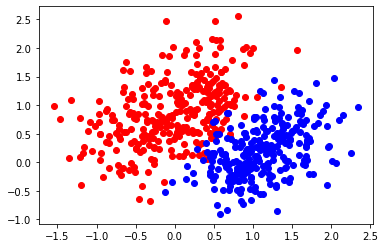

In [4]:
import numpy as np
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

data_filename = 'cls_data_svm_linear_overlap.npy'
cls_data = np.load(data_filename)

x_data, y_data = cls_data[:, :-1], cls_data[:, -1]

x_train, x_test, y_train, y_test = train_test_split(
    x_data, y_data,
    train_size=0.8, shuffle=True,
    stratify=y_data
)

plt.figure()

pos_data = x_data[y_data == 1, :]
neg_data = x_data[y_data == 0, :]

plt.scatter(pos_data[:, 0], pos_data[:, 1], c='red')
plt.scatter(neg_data[:, 0], neg_data[:, 1], c='blue')

plt.show()

get 62 support vectors
get 31 positive support vectors
get 31 negative support vectors


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


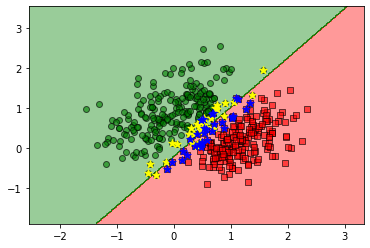

accuracy is 97.39%


In [5]:
from sklearn.svm import SVC

model = SVC(kernel='linear')
model.fit(x_train, y_train)

sv = model.support_vectors_
pos_ev = np.stack([item for item in sv if y_train[np.where(np.all(x_train == item, axis=1))[0]] == 1])
neg_ev = np.stack([item for item in sv if y_train[np.where(np.all(x_train == item, axis=1))[0]] == 0])
print(f"get {sv.shape[0]} support vectors")
print(f"get {pos_ev.shape[0]} positive support vectors")
print(f"get {neg_ev.shape[0]} negative support vectors")

plt.figure()
plot_decision_regions(x_train, y_train[:, None], classifier=model)
plt.scatter(
    pos_ev[:, 0], pos_ev[:, 1], marker='*', color='yellow', s=60
)
plt.scatter(
    neg_ev[:, 0], neg_ev[:, 1], marker='*', color='blue', s=60
)
plt.show()


accu = (model.predict(x_test) == y_test).mean()
print(f"accuracy is {accu:.2%}")


### 线性不可分

加载线性不可分的数据,并可视化.

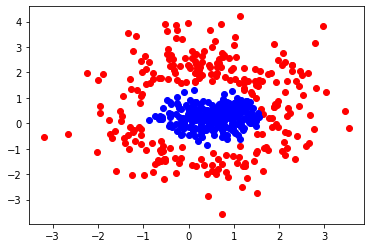

In [6]:
import numpy as np
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

data_filename = 'cls_data_svm_rbf.npy'
cls_data = np.load(data_filename)

x_data, y_data = cls_data[:, :-1], cls_data[:, -1]

x_train, x_test, y_train, y_test = train_test_split(
    x_data, y_data,
    train_size=0.8, shuffle=True,
    stratify=y_data
)

plt.figure()

pos_data = x_data[y_data == 1, :]
neg_data = x_data[y_data == 0, :]

plt.scatter(pos_data[:, 0], pos_data[:, 1], c='red')
plt.scatter(neg_data[:, 0], neg_data[:, 1], c='blue')

plt.show()

使用最简单的SVM分类器进行分类,并可视化结果.

get 347 support vectors
get 174 positive support vectors
get 173 negative support vectors


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


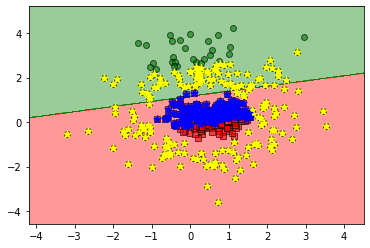

accuracy is 74.53%


In [7]:
from sklearn.svm import SVC

model = SVC(kernel='linear')
model.fit(x_train, y_train)

sv = model.support_vectors_
pos_ev = np.stack([item for item in sv if y_train[np.where(np.all(x_train == item, axis=1))[0]] == 1])
neg_ev = np.stack([item for item in sv if y_train[np.where(np.all(x_train == item, axis=1))[0]] == 0])
print(f"get {sv.shape[0]} support vectors")
print(f"get {pos_ev.shape[0]} positive support vectors")
print(f"get {neg_ev.shape[0]} negative support vectors")

plt.figure()
plot_decision_regions(x_train, y_train[:, None], classifier=model)
plt.scatter(
    pos_ev[:, 0], pos_ev[:, 1], marker='*', color='yellow', s=60
)
plt.scatter(
    neg_ev[:, 0], neg_ev[:, 1], marker='*', color='blue', s=60
)
plt.show()


accu = (model.predict(x_test) == y_test).mean()
print(f"accuracy is {accu:.2%}")


使用kernel为RBF的SVM分类器进行分类,并可视化结果.

get 56 support vectors
get 28 positive support vectors
get 28 negative support vectors


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


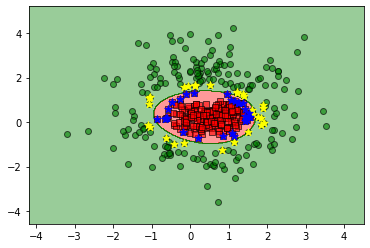

accuracy is 100.00%


In [8]:
from sklearn.svm import SVC

model = SVC(kernel='rbf')
model.fit(x_train, y_train)

sv = model.support_vectors_
pos_ev = np.stack([item for item in sv if y_train[np.where(np.all(x_train == item, axis=1))[0]] == 1])
neg_ev = np.stack([item for item in sv if y_train[np.where(np.all(x_train == item, axis=1))[0]] == 0])
print(f"get {sv.shape[0]} support vectors")
print(f"get {pos_ev.shape[0]} positive support vectors")
print(f"get {neg_ev.shape[0]} negative support vectors")

plt.figure()
plot_decision_regions(x_train, y_train[:, None], classifier=model)
plt.scatter(
    pos_ev[:, 0], pos_ev[:, 1], marker='*', color='yellow', s=60
)
plt.scatter(
    neg_ev[:, 0], neg_ev[:, 1], marker='*', color='blue', s=60
)
plt.show()


accu = (model.predict(x_test) == y_test).mean()
print(f"accuracy is {accu:.2%}")
